# Aufgabe 4: Qhull
In dieser Aufgabe wurde der Quick Hull Algorithmus mit dem Tool Qhull untersucht.<br/>
Teile dieser Aufgabe wurden Inspiriert durch Team "Bissig_Grasso"

Für 2- bis 8-dimensionale, zufällig erzeugte Punktmengen (auf besonders angeordnete Mengen wie Spiralen, Linsen etc. wird hier verzichtet) wird die konvexe Hülle berechnet.

Hierzu wird mit der Funktion rbox die Punktmenge erzeugt. qconvex berechnet mit dem qhull Algorithmus die konvexe Hülle und über die Flag "s" wird die Statistik ausgegeben. FA gibt zudem die Oberfläche und das Volumen der Hülle aus.

<img src="qhull_ausgabe.png" width=60 height=40 />

Für das obige Beispiel wurden 1000 4-dimensionale Punkte erzeugt für die die konvexe Hülle berechnet wurde. Diese besteht aus 171 Punkten (vertices) und 935 Linien (facets). Bei der Berechnung wurden 223 Punkte verarbeitet und 3432 Hyperebenen kreiert, die einen Halbraum definieren und genutzt werden, um die nächsten Punkte auszuschließen oder zuzuordnen. Hierbei werden distance tests durchgeführt, um zu überprüfen, ob Punkte im Polygon liegen. Im Beispiel wurden 38085 Tests durchgeführt. Die Rechenzeit betrug 0.004s und die Oberfläche der konvexen Hülle beträgt 6.03 und das Volumen 0.83.

In [1]:
from scipy.spatial import ConvexHull, convex_hull_plot_2d
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt

Das Ergebnis des quickhull Algorithmus wird im folgenden dargestellt. Hier wird eine zufällige 2-dimensionale Punktmenge erzeugt und deren konvexe Hülle berechnet (mit ConvexHull aus scipy), die anschließend geplottet wird

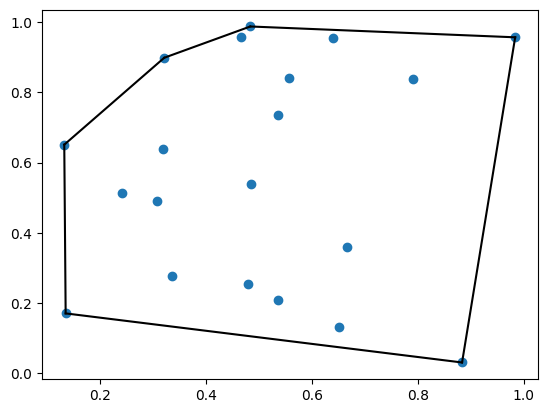

In [2]:
number_points = 20
rand = [random.random() for j in range(number_points*2)]
points = np.array(rand)
points.resize(number_points,2)
hull = ConvexHull(points)

plt.plot(points[:,0], points[:,1], 'o')
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'k-')

Mit dem Programm Qhull wurden die Statistiken ermittelt, die im Folgenden dargestellt werden sollen.

Die Statistiken wurden manuell in einer csv gespeichert. Die folgende Funktion liest die Daten aus und strukturiert sie

In [3]:
def read_qhull_stats(filename, x_name, y_name):
  data = pd.read_csv(filename, sep=';')
  x = data[x_name].tolist()
  y = data[y_name].tolist()
  return x, y

Laden der Dateien

In [4]:
time_file = "8DZeit.csv"
points, time = read_qhull_stats(time_file, 'points', 'time')

Plotten

Text(0, 0.5, 'CPU Zeit [s]')

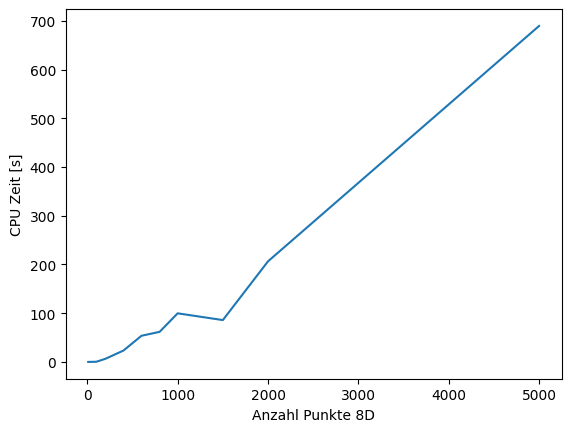

In [5]:
plt.plot(points, time)
plt.xlabel("Anzahl Punkte 8D")
plt.ylabel("CPU Zeit [s]")

Im obigen Plot sind beispielhaft die Rechenzeiten für verschieden große 8-dimensionale Punktmengen dargestellt.
Da die CPU-Zeit von der Hardware und von anderen Prozessen abhängig ist, ist die Anzahl der benötigten Distance Tests besser als Maß für die Komplexität des Algorithmus geeignet und wird im folgenden dargestellt

In [6]:
D2_file = "2D.csv"
D2_points, D2_dist_tests = read_qhull_stats(D2_file, 'points', 'dist_tests')
D3_file = "3D.csv"
D3_points, D3_dist_tests = read_qhull_stats(D3_file, 'points', 'dist_tests')
D4_file = "4D.csv"
D4_points, D4_dist_tests = read_qhull_stats(D4_file, 'points', 'dist_tests')
D5_file = "5D.csv"
D5_points, D5_dist_tests = read_qhull_stats(D5_file, 'points', 'dist_tests')
D6_file = "6D.csv"
D6_points, D6_dist_tests = read_qhull_stats(D6_file, 'points', 'dist_tests')
D7_file = "7D.csv"
D7_points, D7_dist_tests = read_qhull_stats(D7_file, 'points', 'dist_tests')
D8_file = "8D.csv"
D8_points, D8_dist_tests = read_qhull_stats(D8_file, 'points', 'dist_tests')

Plotten der Daten (Aufgrund der hohen Rechendauer wurde für 7 und 8 Dimensionen vorzeitig abgebrochen)

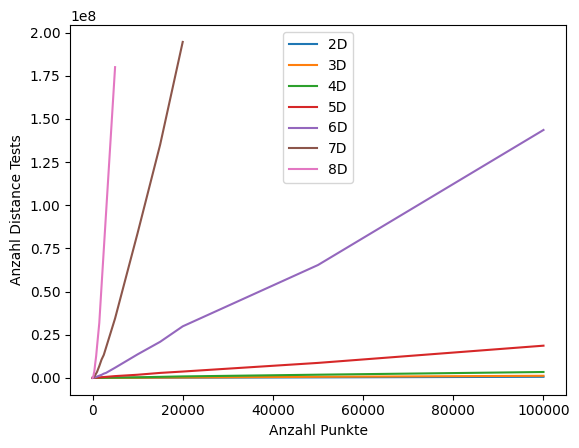

In [11]:
plt.plot(D2_points, D2_dist_tests, label="2D")
plt.plot(D3_points, D3_dist_tests, label="3D")
plt.plot(D4_points, D4_dist_tests, label="4D")
plt.plot(D5_points, D5_dist_tests, label="5D")
plt.plot(D6_points, D6_dist_tests, label="6D")
plt.plot(D7_points, D7_dist_tests, label="7D")
plt.plot(D8_points, D8_dist_tests, label="8D")
plt.xlabel("Anzahl Punkte")
plt.ylabel("Anzahl Distance Tests")
plt.legend()

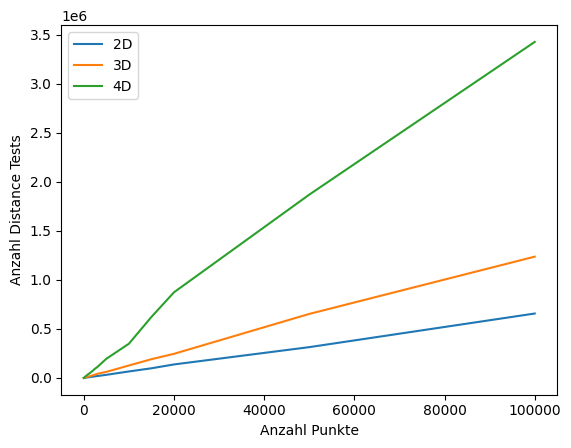

In [8]:
plt.plot(D2_points, D2_dist_tests, label="2D")
plt.plot(D3_points, D3_dist_tests, label="3D")
plt.plot(D4_points, D4_dist_tests, label="4D")
plt.xlabel("Anzahl Punkte")
plt.ylabel("Anzahl Distance Tests")
plt.legend()

Die Komplexität des quickhull Algorithmus ist O(n*logn). Hier zeigt sich allerdings ein nahezu linearer Zusammenhang.

Im folgenden werden die Anzahl der Distance Tests für 10 und 1000 Punkte unter den verschiedenen Dimensionen verglichen:

In [9]:
dimension_10, dist_tests_10 = read_qhull_stats("10Punkte.csv", 'Dimension', 'dist_tests')
dimension_1000, dist_tests_1000 = read_qhull_stats("1000Punkte.csv", 'Dimension', 'dist_tests')
dim_str = []
for d in dimension_10:
  s = str(d)+'D'
  dim_str.append(s)

pd.DataFrame([dist_tests_10, dist_tests_1000], columns=dim_str, index=["10 Punkte", "1000 Punkte"])

,2D,3D,4D,5D,6D,7D,8D
10 Punkte,51,53,65,53,55,23,9
1000 Punkte,6596,12879,38085,175708,777957,3509740,18205216


Bei höherer Dimension werden mehr Tests durchgeführt.
Für 10 Punkte zeigt sich ein umgekehrter Trend, da die initiale Hülle, die basierend auf den extremen Punkten erstellt wird, bereits mehr Punkte enthält, und so nur wenige Punkte geprüft und an der richtigen Stelle eingefügt werden müssen.

Erkennbar ist weiter, dass bei großen Punktmengen in höheren Dimensionen weitere Tests für das Merging durchgeführt werden müssen. Das Merging ist notwendig, da zum Ausgleich numerischer Probleme sogenannte fat planes - hierdurch wird nicht gegen 0 sondern einen kleinen Wert verglichen - entstehen können, durch die auch nicht-konvexe Kanten ermöglicht werden. Abschließend werden diese Kanten zusammengeführt, um eine konvexe Hülle zu erhalten.